In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

ipcc= pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/ipcc.csv", index_col="sector")
economic_sectors= pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/economic_sectors.csv", index_col="source")
energy= pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/energy.csv", index_col= "source")
agriculture = pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/agriculture.csv", index_col= "source")
end_sector_use = pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/end_sector_use.csv", index_col= "sector")
industrial = pd.read_csv(r"/Users/joonkng/Desktop/pandasApp/industrial.csv", index_col="source")



/var/folders/q6/pfqsprsj52v35fn7lymcc8c00000gn/T/ipykernel_91998/2491327100.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [64]:
ipcc = ipcc.astype(float)
ipcc.index = ipcc.index.astype(str)
ipcc.columns = ipcc.columns.astype(str)
ipcc.columns = ipcc.columns.str.replace(r'\D', '')
ipcc = ipcc.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}
# split into training/testing 1990 - 2010; test 2011-
# training split df.iloc[0:20] [20:29]=test
# #2 test split df.iloc[0:25]
# #2 try split on 1990-2015 test 2016-2019
# list of top 3 + bottom 3

for ind in ipcc.index:
    # change to arima model
    reg=LinearRegression().fit(np.array(ipcc.loc[ind].index).reshape (-1,1), ipcc.loc [ind])
    # get scores from arima method
    scores[ind] = reg.score(np.array(ipcc.loc[ind].index).reshape(-1, 1), ipcc.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(ipcc.loc[ind].index).reshape(-1, 1))
 #test loop similar to training loop, but use test data and .predict (or similar method)

coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)


,Coefficient
I_Substitution of Ozone Depleting Substances,5.866624
LULUCF_Forest Land,5.421004
LULUCF Sector Net Totale,4.885594
E_Biomass and Biofuel Consumptionb,3.684751
Agriculture,1.922086
E_Petroleum Systems,1.180444
A_Manure Management,1.024047
A_Agricultural Soil Management,0.827144
Industrial Processes and Product Use,0.718750
I_Other Process Uses of Carbonates,0.140891


,R_squared
Energy,0.053091
E_Fossil Fuel Combustion,0.026548
E_Natural Gas Systems,0.728552
E_Non-Energy Use of Fuels,0.068635
E_Petroleum Systems,0.628085
E_Coal Mining,0.698398
E_Stationary Combustiona,0.052150
E_Mobile Combustiona,0.846972
E_Incineration of Waste,0.022085
E_Abandoned Oil and Gas Wells,0.880743


,Intercept
Energy,24279.921371
E_Fossil Fuel Combustion,17998.355389
E_Natural Gas Systems,2033.674267
E_Non-Energy Use of Fuels,972.048002
E_Petroleum Systems,-2296.532661
E_Coal Mining,2838.879802
E_Stationary Combustiona,-105.609366
E_Mobile Combustiona,2636.476008
E_Incineration of Waste,-9.864809
E_Abandoned Oil and Gas Wells,-25.046811


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Energy,5923.375000,5914.150605,5904.926210,5895.701815,5886.477419,5877.253024,5868.028629,5858.804234,5849.579839,5840.355444,5831.131048,5821.906653,5812.682258,5803.457863,5794.233468,5785.009073,5775.784677,5766.560282,5757.335887,5748.111492,5738.887097,5729.662702,5720.438306,5711.213911,5701.989516,5692.765121,5683.540726,5674.316331,5665.091935,5655.867540,5646.643145,5637.418750
E_Fossil Fuel Combustion,5274.136364,5267.742284,5261.348204,5254.954124,5248.560044,5242.165964,5235.771884,5229.377804,5222.983724,5216.589644,5210.195565,5203.801485,5197.407405,5191.013325,5184.619245,5178.225165,5171.831085,5165.437005,5159.042925,5152.648845,5146.254765,5139.860685,5133.466606,5127.072526,5120.678446,5114.284366,5107.890286,5101.496206,5095.102126,5088.708046,5082.313966,5075.919886
E_Natural Gas Systems,245.555682,244.657130,243.758578,242.860026,241.961474,241.062922,240.164370,239.265817,238.367265,237.468713,236.570161,235.671609,234.773057,233.874505,232.975953,232.077401,231.178849,230.280297,229.381745,228.483193,227.584641,226.686089,225.787537,224.888985,223.990433,223.091880,222.193328,221.294776,220.396224,219.497672,218.599120,217.700568
E_Non-Energy Use of Fuels,124.510795,124.084897,123.658999,123.233101,122.807203,122.381305,121.955407,121.529509,121.103611,120.677713,120.251815,119.825916,119.400018,118.974120,118.548222,118.122324,117.696426,117.270528,116.844630,116.418732,115.992834,115.566935,115.141037,114.715139,114.289241,113.863343,113.437445,113.011547,112.585649,112.159751,111.733853,111.307955
E_Petroleum Systems,52.550000,53.730444,54.910887,56.091331,57.271774,58.452218,59.632661,60.813105,61.993548,63.173992,64.354435,65.534879,66.715323,67.895766,69.076210,70.256653,71.437097,72.617540,73.797984,74.978427,76.158871,77.339315,78.519758,79.700202,80.880645,82.061089,83.241532,84.421976,85.602419,86.782863,87.963306,89.143750
E_Coal Mining,101.790909,100.415488,99.040066,97.664644,96.289223,94.913801,93.538380,92.162958,90.787537,89.412115,88.036694,86.661272,85.285850,83.910429,82.535007,81.159586,79.784164,78.408743,77.033321,75.657900,74.282478,72.907056,71.531635,70.156213,68.780792,67.405370,66.029949,64.654527,63.279106,61.903684,60.528262,59.152841
E_Stationary Combustiona,34.121023,34.191239,34.261455,34.331672,34.401888,34.472104,34.542320,34.612537,34.682753,34.752969,34.823185,34.893402,34.963618,35.033834,35.104051,35.174267,35.244483,35.314699,35.384916,35.455132,35.525348,35.595565,35.665781,35.735997,35.806213,35.876430,35.946646,36.016862,36.087078,36.157295,36.227511,36.297727
E_Mobile Combustiona,59.506250,58.211290,56.916331,55.621371,54.326411,53.031452,51.736492,50.441532,49.146573,47.851613,46.556653,45.261694,43.966734,42.671774,41.376815,40.081855,38.786895,37.491935,36.196976,34.902016,33.607056,32.312097,31.017137,29.722177,28.427218,27.132258,25.837298,24.542339,23.247379,21.952419,20.657460,19.362500
E_Incineration of Waste,13.514773,13.526521,13.538270,13.550018,13.561767,13.573515,13.585264,13.597012,13.608761,13.620510,13.632258,13.644007,13.655755,13.667504,13.679252,13.691001,13.702749,13.714498,13.726246,13.737995,13.749743,13.761492,13.773240,13.784989,13.796738,13.808486,13.820235,13.831983,13.843732,13.855480,13.867229,13.878977
E_Abandoned Oil and Gas Wells,7.815909,7.832423,7.848937,7.865451,7.881965,7.898479,7.914993,7.931507,7.948021,7.964534,7.981048,7.997562,8.014076,8.030590,8.047104,8.063618,8.080132,8.096646,8.113160,8.129674,8.146188,8.162702,8.179216,8.195729,8.212243,8.228757,8.245271,8.261785,8.278299,8.294813,8.311327,8.327841


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided,

MAE: 3152.360745993896, MSE: 14452689.53438488, RMSE: 3801.6693089200803


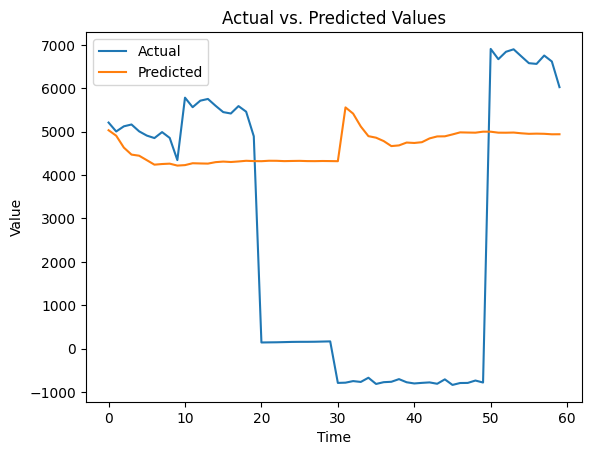

,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,2001.00,2002.00,2003.00,2004.00,2005.00,2006.00,2007.00,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00
E_Fossil Fuel Combustion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5032.798565,4906.705401,4632.681493,4471.418377,4445.839523,4343.120120,4239.283387,4254.157599,4262.601534,4217.988569,4228.949536,4272.196026
Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5559.395697,5416.042586,5119.354317,4896.633378,4861.032833,4782.907069,4667.522348,4683.371689,4748.983435,4739.593000,4757.438610,4844.616913
I_Substitution of Ozone Depleting Substances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.993575,147.008434,153.931489,160.149008,165.835762,171.269059,176.474015,181.457269,186.150495,190.535099,194.607658,198.400972
LULUCF Sector Net Totale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-789.248424,-774.057702,-749.462336,-749.002035,-746.705408,-779.818578,-752.099056,-748.620356,-753.161761,-757.848165,-765.821934,-746.862326
LULUCF_Forest Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-813.480952,-791.366251,-778.113997,-772.756371,-779.083052,-799.603040,-774.110845,-777.695718,-777.653554,-786.377419,-784.177855,-773.507874
Total Gross Emissionsd (Sources),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6661.200655,6538.571198,6249.440342,6067.582660,6087.690303,6040.388483,5958.460163,6011.066570,6090.027640,6081.108702,6102.806367,6179.688298


In [65]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = ipcc.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

# Trim predictions to match the length of testing_data_values
predictions_values = predictions_values[:len(testing_data_values)]

# Calculate MAE, MSE, RMSE for testing data
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)

In [66]:
economic_sectors = economic_sectors.astype(float)

economic_sectors.index = economic_sectors.index.astype(str)
economic_sectors.columns = economic_sectors.columns.astype(str)
economic_sectors.columns = economic_sectors.columns.str.replace(r'\D', '')
economic_sectors = economic_sectors.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}


for ind in economic_sectors.index:
    reg=LinearRegression().fit(np.array(economic_sectors.loc[ind].index).reshape (-1,1), economic_sectors.loc [ind])
    scores[ind] = reg.score(np.array(economic_sectors.loc[ind].index).reshape(-1, 1), economic_sectors.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(economic_sectors.loc[ind].index).reshape(-1, 1))


coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)

,Coefficient
T_CO2 from Fossil Fuel Combustion,6.854417
Transportation,6.412170
LULUCF Sector Net Totalc,4.885594
A_Substitution of Ozone Depleting Substances,2.491276
Agriculture,1.866935
I_Substitution of Ozone Depleting Substances,1.195858
I_Petroleum Systems,1.180444
R_Substitution of Ozone Depleting Substances,1.169153
A_Manure Management,1.024047
T_Substitution of Ozone Depleting Substances,1.011309


,R_squared
Transportation,0.196335
T_CO2 from Fossil Fuel Combustion,0.279401
T_Substitution of Ozone Depleting Substances,0.208517
T_Mobile Combustionb,0.864169
T_Non-Energy Use of Fuels,0.593276
Electric Power Industry,0.099476
EP_CO2 from Fossil Fuel Combustion,0.092092
EP_Stationary Combustionb,0.161548
EP_Incineration of Waste,0.022085
EP_Electrical Transmission and Distribution,0.919322


,Intercept
Transportation,-11076.432111
T_CO2 from Fossil Fuel Combustion,-12047.705480
T_Substitution of Ozone Depleting Substances,-1987.326375
T_Mobile Combustionb,2760.378024
T_Non-Energy Use of Fuels,199.667027
Electric Power Industry,19939.738471
EP_CO2 from Fossil Fuel Combustion,19038.194318
EP_Stationary Combustionb,-249.510282
EP_Incineration of Waste,-9.864809
EP_Electrical Transmission and Distribution,1299.022122


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Transportation,1683.786364,1690.198534,1696.610704,1703.022874,1709.435044,1715.847214,1722.259384,1728.671554,1735.083724,1741.495894,1747.908065,1754.320235,1760.732405,1767.144575,1773.556745,1779.968915,1786.381085,1792.793255,1799.205425,1805.617595,1812.029765,1818.441935,1824.854106,1831.266276,1837.678446,1844.090616,1850.502786,1856.914956,1863.327126,1869.739296,1876.151466,1882.563636
T_CO2 from Fossil Fuel Combustion,1592.584659,1599.439076,1606.293493,1613.147911,1620.002328,1626.856745,1633.711162,1640.565579,1647.419996,1654.274413,1661.128831,1667.983248,1674.837665,1681.692082,1688.546499,1695.400916,1702.255334,1709.109751,1715.964168,1722.818585,1729.673002,1736.527419,1743.381837,1750.236254,1757.090671,1763.945088,1770.799505,1777.653922,1784.508339,1791.362757,1798.217174,1805.071591
T_Substitution of Ozone Depleting Substances,25.177841,26.189150,27.200458,28.211767,29.223076,30.234384,31.245693,32.257001,33.268310,34.279619,35.290927,36.302236,37.313545,38.324853,39.336162,40.347471,41.358779,42.370088,43.381397,44.392705,45.404014,46.415323,47.426631,48.437940,49.449249,50.460557,51.471866,52.483174,53.494483,54.505792,55.517100,56.528409
T_Mobile Combustionb,54.218750,52.858871,51.498992,50.139113,48.779234,47.419355,46.059476,44.699597,43.339718,41.979839,40.619960,39.260081,37.900202,36.540323,35.180444,33.820565,32.460685,31.100806,29.740927,28.381048,27.021169,25.661290,24.301411,22.941532,21.581653,20.221774,18.861895,17.502016,16.142137,14.782258,13.422379,12.062500
T_Non-Energy Use of Fuels,11.791477,11.697067,11.602658,11.508248,11.413838,11.319428,11.225018,11.130609,11.036199,10.941789,10.847379,10.752969,10.658559,10.564150,10.469740,10.375330,10.280920,10.186510,10.092100,9.997691,9.903281,9.808871,9.714461,9.620051,9.525641,9.431232,9.336822,9.242412,9.148002,9.053592,8.959183,8.864773
Electric Power Industry,2227.097159,2218.196334,2209.295510,2200.394685,2191.493860,2182.593035,2173.692210,2164.791386,2155.890561,2146.989736,2138.088911,2129.188087,2120.287262,2111.386437,2102.485612,2093.584787,2084.683963,2075.783138,2066.882313,2057.981488,2049.080663,2040.179839,2031.279014,2022.378189,2013.477364,2004.576540,1995.675715,1986.774890,1977.874065,1968.973240,1960.072416,1951.171591
EP_CO2 from Fossil Fuel Combustion,2167.290909,2158.813068,2150.335227,2141.857386,2133.379545,2124.901705,2116.423864,2107.946023,2099.468182,2090.990341,2082.512500,2074.034659,2065.556818,2057.078977,2048.601136,2040.123295,2031.645455,2023.167614,2014.689773,2006.211932,1997.734091,1989.256250,1980.778409,1972.300568,1963.822727,1955.344886,1946.867045,1938.389205,1929.911364,1921.433523,1912.955682,1904.477841
EP_Stationary Combustionb,21.306250,21.442339,21.578427,21.714516,21.850605,21.986694,22.122782,22.258871,22.394960,22.531048,22.667137,22.803226,22.939315,23.075403,23.211492,23.347581,23.483669,23.619758,23.755847,23.891935,24.028024,24.164113,24.300202,24.436290,24.572379,24.708468,24.844556,24.980645,25.116734,25.252823,25.388911,25.525000
EP_Incineration of Waste,13.514773,13.526521,13.538270,13.550018,13.561767,13.573515,13.585264,13.597012,13.608761,13.620510,13.632258,13.644007,13.655755,13.667504,13.679252,13.691001,13.702749,13.714498,13.726246,13.737995,13.749743,13.761492,13.773240,13.784989,13.796738,13.808486,13.820235,13.831983,13.843732,13.855480,13.867229,13.878977
EP_Electrical Transmission and Distribution,22.117614,21.475953,20.834293,20.192632,19.550971,18.909311,18.267650,17.625990,16.984329,16.342669,15.701008,15.059348,14.417687,13.776026,13.134366,12.492705,11.851045,11.209384,10.567724,9.926063,9.284402,8.642742,8.001081,7.359421,6.717760,6.076100,5.434439,4.792779,4.151118,3.509457,2.867797,2.226136


MAE: 1489.4131924744024, MSE: 5010169.093741285, RMSE: 2238.340700997345


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/joonkng/Projects/.venv/lib/python3.12/site-packa

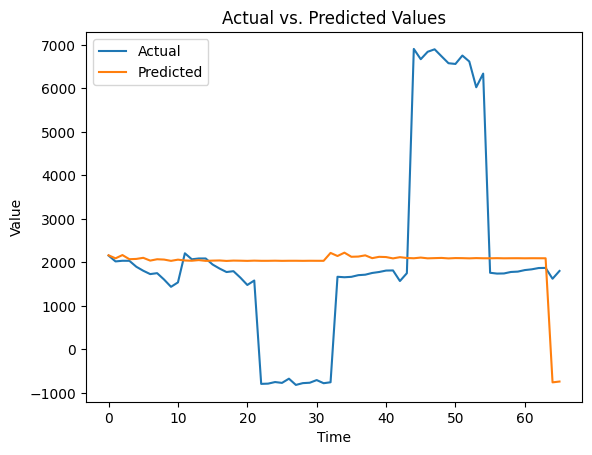

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
EP_CO2 from Fossil Fuel Combustion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2163.699073,2094.335215,2169.288897,2074.192969,2080.601605,2105.896988,2041.929684,2073.134682,2065.673765,2036.130320,2063.842017
Electric Power Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2218.812979,2147.439391,2224.555127,2129.917641,2134.848582,2162.682958,2098.109919,2128.809969,2123.457584,2092.641601,2120.821304
LULUCF Sector Net Totalc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-756.430234,-737.363065,-738.561681,-728.047147,-744.944187,-739.778383,-733.922912,-736.410388,-733.798460,-740.537972,-735.633284
T_CO2 from Fossil Fuel Combustion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686.660311,1668.275305,1660.180212,1659.346188,1655.806644,1652.637103,1651.369231,1650.734919,1649.897467,1649.337934,1649.071501
Total Gross Emissions (Sources),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6979.210877,6711.206838,6756.779149,6840.108141,6660.138430,6643.158358,6735.147406,6659.435498,6601.847067,6672.009875,6656.997625
Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1780.096074,1756.514913,1746.856413,1745.675822,1739.944812,1735.376914,1733.766454,1732.757338,1731.262840,1730.397426,1730.005812


In [67]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = economic_sectors.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

# Align the lengths of training and testing data and predictions
years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

# Trim predictions to match the length of testing_data_values
predictions_values = predictions_values[:len(testing_data_values)]

# Calculate MAE, MSE, RMSE for testing data
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)

In [83]:
energy = energy.astype(float)

energy.index = energy.index.astype(str)
energy.columns = energy.columns.astype(str)
energy.columns = energy.columns.str.replace(r'\D', '')
energy = energy.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}

for ind in energy.index:
    reg=LinearRegression().fit(np.array(energy.loc[ind].index).reshape (-1,1), energy.loc [ind])
    scores[ind] = reg.score(np.array(energy.loc[ind].index).reshape(-1, 1), energy.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(energy.loc[ind].index).reshape(-1, 1))


coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)

,Coefficient
FFC_CO2_Transportation,6.854839
CO2_Biofuels-Ethanola,3.257661
CO2_Petroleum Systems,0.838618
CO2_Biofuels-Biodiesela,0.683174
CH4_Petroleum Systems,0.341074
FFC_CO2_Commercial,0.181800
FFC_CO2_U.S. Territories,0.164113
CO2_Natural Gas Systems,0.149487
N2O_Stationary Combustion,0.072086
CO2_International Bunker Fuelsb,0.024982


,R_squared
CO2,0.022973
CO2_Fossil Fuel Combustion,0.026548
FFC_CO2_Transportation,0.279418
FFC_CO2_Electricity Generation,0.092095
FFC_CO2_Industrial,0.556037
FFC_CO2_Residential,0.407522
FFC_CO2_Commercial,0.031207
FFC_CO2_U.S. Territories,0.017979
CO2_Non-Energy Use of Fuels,0.068635
CO2_Natural Gas Systems,0.137777


,Intercept
CO2,17139.288783
CO2_Fossil Fuel Combustion,17998.355389
FFC_CO2_Transportation,-12048.554032
FFC_CO2_Electricity Generation,19038.448497
FFC_CO2_Industrial,7696.837023
FFC_CO2_Residential,3745.939351
FFC_CO2_Commercial,-135.152731
FFC_CO2_U.S. Territories,-297.765927
CO2_Non-Energy Use of Fuels,972.048002
CO2_Natural Gas Systems,-271.145784


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
CO2,5446.105682,5440.229710,5434.353739,5428.477768,5422.601796,5416.725825,5410.849853,5404.973882,5399.097911,5393.221939,5387.345968,5381.469996,5375.594025,5369.718054,5363.842082,5357.966111,5352.090139,5346.214168,5340.338196,5334.462225,5328.586254,5322.710282,5316.834311,5310.958339,5305.082368,5299.206397,5293.330425,5287.454454,5281.578482,5275.702511,5269.826540,5263.950568
CO2_Fossil Fuel Combustion,5274.136364,5267.742284,5261.348204,5254.954124,5248.560044,5242.165964,5235.771884,5229.377804,5222.983724,5216.589644,5210.195565,5203.801485,5197.407405,5191.013325,5184.619245,5178.225165,5171.831085,5165.437005,5159.042925,5152.648845,5146.254765,5139.860685,5133.466606,5127.072526,5120.678446,5114.284366,5107.890286,5101.496206,5095.102126,5088.708046,5082.313966,5075.919886
FFC_CO2_Transportation,1592.575000,1599.429839,1606.284677,1613.139516,1619.994355,1626.849194,1633.704032,1640.558871,1647.413710,1654.268548,1661.123387,1667.978226,1674.833065,1681.687903,1688.542742,1695.397581,1702.252419,1709.107258,1715.962097,1722.816935,1729.671774,1736.526613,1743.381452,1750.236290,1757.091129,1763.945968,1770.800806,1777.655645,1784.510484,1791.365323,1798.220161,1805.075000
FFC_CO2_Electricity Generation,2167.289773,2158.811804,2150.333834,2141.855865,2133.377896,2124.899927,2116.421957,2107.943988,2099.466019,2090.988050,2082.510081,2074.032111,2065.554142,2057.076173,2048.598204,2040.120235,2031.642265,2023.164296,2014.686327,2006.208358,1997.730389,1989.252419,1980.774450,1972.296481,1963.818512,1955.340543,1946.862573,1938.384604,1929.906635,1921.428666,1912.950696,1904.472727
FFC_CO2_Industrial,891.044318,887.624322,884.204326,880.784329,877.364333,873.944337,870.524340,867.104344,863.684348,860.264351,856.844355,853.424359,850.004362,846.584366,843.164370,839.744373,836.324377,832.904380,829.484384,826.064388,822.644391,819.224395,815.804399,812.384402,808.964406,805.544410,802.124413,798.704417,795.284421,791.864424,788.444428,785.024432
FFC_CO2_Residential,367.790341,366.092779,364.395216,362.697654,361.000092,359.302529,357.604967,355.907405,354.209842,352.512280,350.814718,349.117155,347.419593,345.722031,344.024468,342.326906,340.629344,338.931782,337.234219,335.536657,333.839095,332.141532,330.443970,328.746408,327.048845,325.351283,323.653721,321.956158,320.258596,318.561034,316.863471,315.165909
FFC_CO2_Commercial,226.628977,226.810777,226.992577,227.174377,227.356177,227.537977,227.719776,227.901576,228.083376,228.265176,228.446976,228.628776,228.810576,228.992375,229.174175,229.355975,229.537775,229.719575,229.901375,230.083174,230.264974,230.446774,230.628574,230.810374,230.992174,231.173974,231.355773,231.537573,231.719373,231.901173,232.082973,232.264773
FFC_CO2_U.S. Territories,28.818750,28.982863,29.146976,29.311089,29.475202,29.639315,29.803427,29.967540,30.131653,30.295766,30.459879,30.623992,30.788105,30.952218,31.116331,31.280444,31.444556,31.608669,31.772782,31.936895,32.101008,32.265121,32.429234,32.593347,32.757460,32.921573,33.085685,33.249798,33.413911,33.578024,33.742137,33.906250
CO2_Non-Energy Use of Fuels,124.510795,124.084897,123.658999,123.233101,122.807203,122.381305,121.955407,121.529509,121.103611,120.677713,120.251815,119.825916,119.400018,118.974120,118.548222,118.122324,117.696426,117.270528,116.844630,116.418732,115.992834,115.566935,115.141037,114.715139,114.289241,113.863343,113.437445,113.011547,112.585649,112.159751,111.733853,111.307955
CO2_Natural Gas Systems,26.332955,26.482441,26.631928,26.781415,26.930902,27.080389,27.229875,27.379362,27.528849,27.678336,27.827823,27.977309,28.126796,28.276283,28.425770,28.575257,28.724743,28.874230,29.023717,29.173204,29.322691,29.472177,29.621664,29.771151,29.920638,30.070125,30.219611,30.369098,30.518585,30.668072,30.817559,30.967045


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided,

MAE: 1893.7517356741032, MSE: 6324605.884692693, RMSE: 2514.876912433826


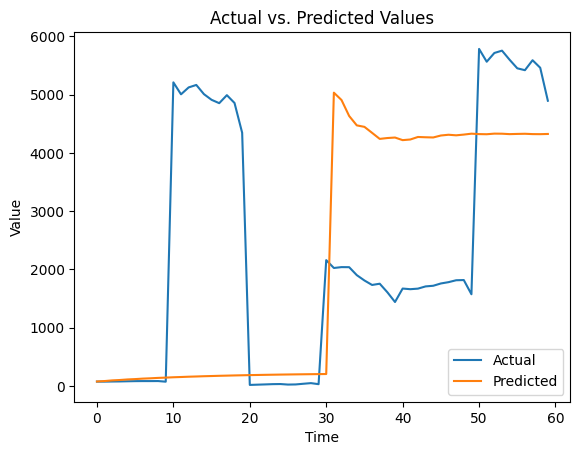

,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,2001.00,2002.00,2003.00,2004.00,2005.00,2006.00,2007.00,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00
CO2_Biofuels-Ethanola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.283649,82.648719,93.830727,100.573425,110.098346,116.212055,124.341703,129.840206,136.793667,141.713327,147.674456,152.058256
CO2_Fossil Fuel Combustion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5032.798565,4906.705401,4632.681493,4471.418377,4445.839523,4343.120120,4239.283387,4254.157599,4262.601534,4217.988569,4228.949536,4272.196026
CO2_Petroleum Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.618226,11.767305,11.698149,11.742520,11.899344,11.884140,11.900539,11.929685,11.898278,11.919229,11.938949,11.929069
FFC_CO2_Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2146.378630,2055.882352,1969.112477,1981.550518,1927.714616,1908.844514,1917.479803,1890.965449,1893.645925,1895.469469,1884.288269,1889.950674
FFC_CO2_Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1631.755234,1589.804770,1554.637075,1539.235050,1530.055557,1527.573149,1527.907751,1530.987102,1533.767658,1536.691788,1538.888464,1540.599615
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5559.395697,5416.042586,5119.354317,4896.633378,4861.032833,4782.907069,4667.522348,4683.371689,4748.983435,4739.593000,4757.438610,4844.616913


In [84]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = energy.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

# Align the lengths of training and testing data and predictions
years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

# Trim predictions to match the length of testing_data_values
predictions_values = predictions_values[:len(testing_data_values)]

# Calculate MAE, MSE, RMSE for testing data
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)

In [80]:
agriculture = agriculture.astype(float)
agriculture.index = agriculture.index.astype(str)
agriculture.columns = agriculture.columns.astype(str)
agriculture.columns = agriculture.columns.str.replace(r'\D', '')
agriculture = agriculture.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}

for ind in agriculture.index:
    reg=LinearRegression().fit(np.array(agriculture.loc[ind].index).reshape (-1,1), agriculture.loc [ind])
    scores[ind] = reg.score(np.array(agriculture.loc[ind].index).reshape(-1, 1), agriculture.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(agriculture.loc[ind].index).reshape(-1, 1))

coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)

,Coefficient
Total,1.922086
N2O,0.982148
CH4,0.898644
CH4_Manure Management,0.869758
N2O_Agricultural Soil Management,0.827144
N2O_Manure Management,0.153776
CO2_Urea Fertilization,0.093787
CH4_Enteric Fermentation,0.078776
CO2,0.041092
CH4_Field Burning of Agricultural Residues,0.003757


,R_squared
CO2,0.261211
CO2_Urea Fertilization,0.970108
CO2_Liming,0.364672
CH4,0.691866
CH4_Enteric Fermentation,0.026154
CH4_Manure Management,0.956310
CH4_Rice Cultivation,0.130189
CH4_Field Burning of Agricultural Residues,0.321777
N2O,0.534859
N2O_Agricultural Soil Management,0.444157


,Intercept
CO2,-74.648259
CO2_Urea Fertilization,-184.411015
CO2_Liming,111.640524
CH4,-1538.379930
CH4_Enteric Fermentation,33.034164
CH4_Manure Management,-1689.862298
CH4_Rice Cultivation,125.276228
CH4_Field Burning of Agricultural Residues,-7.082203
N2O,-1659.460502
N2O_Agricultural Soil Management,-1363.566276


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
CO2,7.125568,7.166661,7.207753,7.248845,7.289938,7.331030,7.372122,7.413215,7.454307,7.495400,7.536492,7.577584,7.618677,7.659769,7.700861,7.741954,7.783046,7.824139,7.865231,7.906323,7.947416,7.988508,8.029600,8.070693,8.111785,8.152878,8.193970,8.235062,8.276155,8.317247,8.358339,8.399432
CO2_Urea Fertilization,2.224432,2.318218,2.412005,2.505792,2.599578,2.693365,2.787152,2.880938,2.974725,3.068512,3.162298,3.256085,3.349872,3.443658,3.537445,3.631232,3.725018,3.818805,3.912592,4.006378,4.100165,4.193952,4.287738,4.381525,4.475312,4.569098,4.662885,4.756672,4.850458,4.944245,5.038032,5.131818
CO2_Liming,4.918750,4.865121,4.811492,4.757863,4.704234,4.650605,4.596976,4.543347,4.489718,4.436089,4.382460,4.328831,4.275202,4.221573,4.167944,4.114315,4.060685,4.007056,3.953427,3.899798,3.846169,3.792540,3.738911,3.685282,3.631653,3.578024,3.524395,3.470766,3.417137,3.363508,3.309879,3.256250
CH4,249.921023,250.819666,251.718310,252.616954,253.515598,254.414241,255.312885,256.211529,257.110172,258.008816,258.907460,259.806103,260.704747,261.603391,262.502034,263.400678,264.299322,265.197966,266.096609,266.995253,267.893897,268.792540,269.691184,270.589828,271.488471,272.387115,273.285759,274.184402,275.083046,275.981690,276.880334,277.778977
CH4_Enteric Fermentation,189.797727,189.876503,189.955279,190.034054,190.112830,190.191606,190.270381,190.349157,190.427933,190.506708,190.585484,190.664260,190.743035,190.821811,190.900587,190.979362,191.058138,191.136913,191.215689,191.294465,191.373240,191.452016,191.530792,191.609567,191.688343,191.767119,191.845894,191.924670,192.003446,192.082221,192.160997,192.239773
CH4_Manure Management,40.956250,41.826008,42.695766,43.565524,44.435282,45.305040,46.174798,47.044556,47.914315,48.784073,49.653831,50.523589,51.393347,52.263105,53.132863,54.002621,54.872379,55.742137,56.611895,57.481653,58.351411,59.221169,60.090927,60.960685,61.830444,62.700202,63.569960,64.439718,65.309476,66.179234,67.048992,67.918750
CH4_Rice Cultivation,18.773295,18.719776,18.666257,18.612738,18.559219,18.505700,18.452181,18.398662,18.345143,18.291624,18.238105,18.184586,18.131067,18.077548,18.024029,17.970510,17.916990,17.863471,17.809952,17.756433,17.702914,17.649395,17.595876,17.542357,17.488838,17.435319,17.381800,17.328281,17.274762,17.221243,17.167724,17.114205
CH4_Field Burning of Agricultural Residues,0.394886,0.398644,0.402401,0.406158,0.409916,0.413673,0.417430,0.421188,0.424945,0.428702,0.432460,0.436217,0.439974,0.443732,0.447489,0.451246,0.455004,0.458761,0.462518,0.466276,0.470033,0.473790,0.477548,0.481305,0.485062,0.488820,0.492577,0.496334,0.500092,0.503849,0.507606,0.511364
N2O,295.014205,295.996353,296.978501,297.960649,298.942797,299.924945,300.907093,301.889241,302.871389,303.853537,304.835685,305.817834,306.799982,307.782130,308.764278,309.746426,310.728574,311.710722,312.692870,313.675018,314.657166,315.639315,316.621463,317.603611,318.585759,319.567907,320.550055,321.532203,322.514351,323.496499,324.478647,325.460795
N2O_Agricultural Soil Management,282.451136,283.278281,284.105425,284.932570,285.759714,286.586859,287.414003,288.241147,289.068292,289.895436,290.722581,291.549725,292.376870,293.204014,294.031158,294.858303,295.685447,296.512592,297.339736,298.166880,298.994025,299.821169,300.648314,301.475458,302.302603,303.129747,303.956891,304.784036,305.611180,306.438325,307.265469,308.092614


MAE: 237.11769644180413, MSE: 95141.37750294736, RMSE: 308.44995947956835


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473

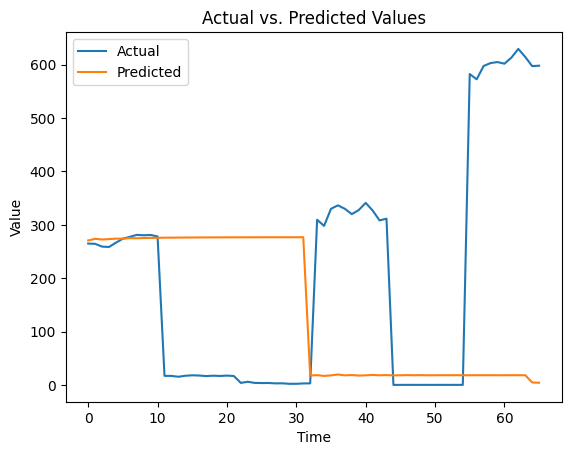

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.755772,273.781805,272.513151,273.261366,274.113581,274.117747,275.125519,274.821946,275.266239,275.514524,275.596729
CH4_Rice Cultivation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.636955,18.476682,16.952172,18.008237,19.590201,18.044262,18.594052,17.616369,18.062982,18.847938,18.177971
CO2_Liming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700987,4.214866,4.832025,4.223180,4.481896,4.748538,4.281832,4.621733,4.481905,4.393967,4.663561
N2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.346476,308.016662,310.137153,307.083079,311.080368,309.269151,306.386783,310.061459,308.081173,307.824630,310.702520
N2O_Field Burning of Agricultural Residues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193937,0.156805,0.196749,0.193176,0.190383,0.191491,0.191350,0.176974,0.192839,0.190341,0.188430
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579.972649,583.883149,585.846151,580.259932,586.473836,585.081620,582.498547,586.866155,583.563474,583.514831,585.992504


In [81]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = agriculture.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

# Align the lengths of training and testing data and predictions
years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

# Trim predictions to match the length of testing_data_values
predictions_values = predictions_values[:len(testing_data_values)]

# Calculate MAE, MSE, RMSE for testing data
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)

In [70]:
end_sector_use = end_sector_use.astype(float)
end_sector_use.index = end_sector_use.index.astype(str)
end_sector_use.columns = end_sector_use.columns.astype(str)
end_sector_use.columns = end_sector_use.columns.str.replace(r'\D', '')
end_sector_use = end_sector_use.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}

for ind in end_sector_use.index:
    reg=LinearRegression().fit(np.array(end_sector_use.loc[ind].index).reshape (-1,1), end_sector_use.loc [ind])
    scores[ind] = reg.score(np.array(end_sector_use.loc[ind].index).reshape(-1, 1), end_sector_use.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(end_sector_use.loc[ind].index).reshape(-1, 1))

coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)

,Coefficient
Transportation,6.916404
T_Combustion,6.854839
Commercial,0.907258
C_Electricity,0.723974
C_Combustion,0.181800
U.S. Territoriesa,0.164113
R_Electricity,0.084402
T_Electricity,0.062060
Residential,-1.613416
R_Combustion,-1.697562


,R_squared
Transportation,0.282111
T_Combustion,0.279418
T_Electricity,0.684091
Industrial,0.703521
I_Combustion,0.556037
I_Electricity,0.680528
Residential,0.021574
R_Combustion,0.407522
R_Electricity,0.000070
Commercial,0.007525


,Intercept
Transportation,-12168.057515
T_Combustion,-12048.554032
T_Electricity,-120.505315
Industrial,27095.426650
I_Combustion,7696.837023
I_Electricity,19398.549743
Residential,4286.962885
R_Combustion,3745.939351
R_Electricity,540.515176
Commercial,-920.456048


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Transportation,1595.586364,1602.502768,1609.419172,1616.335576,1623.251979,1630.168383,1637.084787,1644.001191,1650.917595,1657.833999,1664.750403,1671.666807,1678.583211,1685.499615,1692.416019,1699.332423,1706.248827,1713.165231,1720.081635,1726.998039,1733.914443,1740.830847,1747.747251,1754.663655,1761.580059,1768.496463,1775.412867,1782.329271,1789.245674,1796.162078,1803.078482,1809.994886
T_Combustion,1592.575000,1599.429839,1606.284677,1613.139516,1619.994355,1626.849194,1633.704032,1640.558871,1647.413710,1654.268548,1661.123387,1667.978226,1674.833065,1681.687903,1688.542742,1695.397581,1702.252419,1709.107258,1715.962097,1722.816935,1729.671774,1736.526613,1743.381452,1750.236290,1757.091129,1763.945968,1770.800806,1777.655645,1784.510484,1791.365323,1798.220161,1805.075000
T_Electricity,2.994318,3.056378,3.118438,3.180499,3.242559,3.304619,3.366679,3.428739,3.490799,3.552859,3.614919,3.676979,3.739040,3.801100,3.863160,3.925220,3.987280,4.049340,4.111400,4.173460,4.235521,4.297581,4.359641,4.421701,4.483761,4.545821,4.607881,4.669941,4.732001,4.794062,4.856122,4.918182
Industrial,1688.459091,1675.691771,1662.924450,1650.157130,1637.389809,1624.622489,1611.855169,1599.087848,1586.320528,1573.553207,1560.785887,1548.018567,1535.251246,1522.483926,1509.716606,1496.949285,1484.181965,1471.414644,1458.647324,1445.880004,1433.112683,1420.345363,1407.578043,1394.810722,1382.043402,1369.276081,1356.508761,1343.741441,1330.974120,1318.206800,1305.439479,1292.672159
I_Combustion,891.044318,887.624322,884.204326,880.784329,877.364333,873.944337,870.524340,867.104344,863.684348,860.264351,856.844355,853.424359,850.004362,846.584366,843.164370,839.744373,836.324377,832.904380,829.484384,826.064388,822.644391,819.224395,815.804399,812.384402,808.964406,805.544410,802.124413,798.704417,795.284421,791.864424,788.444428,785.024432
I_Electricity,797.411364,788.064058,778.716752,769.369446,760.022141,750.674835,741.327529,731.980224,722.632918,713.285612,703.938306,694.591001,685.243695,675.896389,666.549084,657.201778,647.854472,638.507166,629.159861,619.812555,610.465249,601.117944,591.770638,582.423332,573.076026,563.728721,554.381415,545.034109,535.686804,526.339498,516.992192,507.644886
Residential,1076.264205,1074.650788,1073.037372,1071.423955,1069.810539,1068.197122,1066.583706,1064.970290,1063.356873,1061.743457,1060.130040,1058.516624,1056.903207,1055.289791,1053.676375,1052.062958,1050.449542,1048.836125,1047.222709,1045.609293,1043.995876,1042.382460,1040.769043,1039.155627,1037.542210,1035.928794,1034.315378,1032.701961,1031.088545,1029.475128,1027.861712,1026.248295
R_Combustion,367.790341,366.092779,364.395216,362.697654,361.000092,359.302529,357.604967,355.907405,354.209842,352.512280,350.814718,349.117155,347.419593,345.722031,344.024468,342.326906,340.629344,338.931782,337.234219,335.536657,333.839095,332.141532,330.443970,328.746408,327.048845,325.351283,323.653721,321.956158,320.258596,318.561034,316.863471,315.165909
R_Electricity,708.476136,708.560539,708.644941,708.729344,708.813746,708.898149,708.982551,709.066954,709.151356,709.235759,709.320161,709.404564,709.488966,709.573369,709.657771,709.742174,709.826576,709.910979,709.995381,710.079784,710.164186,710.248589,710.332991,710.417394,710.501796,710.586199,710.670601,710.755004,710.839406,710.923809,711.008211,711.092614
Commercial,884.987500,885.894758,886.802016,887.709274,888.616532,889.523790,890.431048,891.338306,892.245565,893.152823,894.060081,894.967339,895.874597,896.781855,897.689113,898.596371,899.503629,900.410887,901.318145,902.225403,903.132661,904.039919,904.947177,905.854435,906.761694,907.668952,908.576210,909.483468,910.390726,911.297984,912.205242,913.112500


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided,

MAE: 393.6387125101716, MSE: 251964.01587873473, RMSE: 501.9601735981997


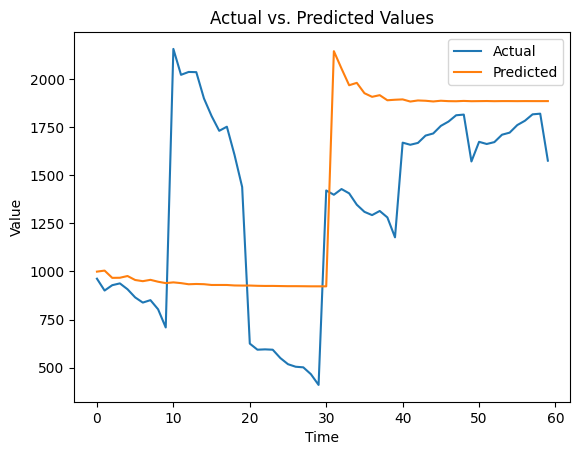

,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,2001.00,2002.00,2003.00,2004.00,2005.00,2006.00,2007.00,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00
Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.299018,1004.670913,966.869773,967.422994,976.470805,955.755558,949.625801,956.613258,946.731419,939.544501,943.435356,939.485978
Electric Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2146.378630,2055.882352,1969.112477,1981.550518,1927.714616,1908.844514,1917.479803,1890.965449,1893.645925,1895.469469,1884.288269,1889.950674
I_Electricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,573.270263,574.502205,554.765501,525.147463,519.790873,519.708366,510.157682,501.668941,501.205865,500.418012,496.581876,494.401907
Industrial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1274.219946,1208.960428,1122.224377,1033.123596,1049.745596,1051.957257,1048.147001,1066.272059,1137.655376,1164.047113,1184.961308,1217.683047
T_Combustion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1631.755234,1589.804770,1554.637075,1539.235050,1530.055557,1527.573149,1527.907751,1530.987102,1533.767658,1536.691788,1538.888464,1540.599615
Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1636.081954,1594.175389,1558.755885,1543.393232,1534.242946,1531.850792,1532.231105,1535.424099,1538.268611,1541.257524,1543.489579,1545.233177


In [71]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = end_sector_use.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

# Align the lengths of training and testing data and predictions
years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

# Trim predictions to match the length of testing_data_values
predictions_values = predictions_values[:len(testing_data_values)]

# Calculate MAE, MSE, RMSE for testing data
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)

In [3]:
industrial = industrial.astype(float)
industrial.index = industrial.index.astype(str)
industrial.columns = industrial.columns.astype(str)
industrial.columns = industrial.columns.str.replace(r'\D', '')
industrial = industrial.replace(' ', '', regex=True)

coefs = {}
scores={}
intercepts = {}
predictions= {}

for ind in industrial.index:
    reg=LinearRegression().fit(np.array(industrial.loc[ind].index).reshape (-1,1), industrial.loc [ind])
    scores[ind] = reg.score(np.array(industrial.loc[ind].index).reshape(-1, 1), industrial.loc[ind])
    coefs [ind]=reg.coef_
    intercepts[ind] = reg.intercept_
    predictions[ind] = reg.predict(np.array(industrial.loc[ind].index).reshape(-1, 1))

coefficients_df = pd.DataFrame.from_dict(coefs, orient='index', columns=['Coefficient'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['R_squared'])
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', axis=0, ascending=False)
predictions_df = pd.DataFrame.from_dict(predictions, orient='index')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_coefficients_df)
    display(scores_df)
    display(intercepts_df)
    display(predictions_df)


,Coefficient
HFC_Substitution_of_Ozone_Depleting_Substancesa,5.864315
HFCs,4.465634
CO2_Other Process Uses of Carbonates,0.140891
CO2_Carbon Dioxide Consumption,0.139608
CO2_Cement Production,0.107588
CO2_Petrochemical Production,0.103684
CO2_Urea Consumption for Non-Agricultural Purposes,0.044025
NF3_Electronics_Industry,0.019666
NF3,0.019666
CO2_Zinc Production,0.008871


,R_squared
CO2,0.724476
CO2_ISMC,0.936162
CO2_ISP,0.938271
CO2_MCP,0.507788
CO2_Cement Production,0.050547
CO2_Petrochemical Production,0.126956
CO2_Ammonia Production,0.365407
CO2_Lime Production,0.004643
CO2_Other Process Uses of Carbonates,0.434812
CO2_Carbon Dioxide Consumption,0.741715


,Intercept
CO2,4248.723882
CO2_ISMC,4447.500696
CO2_ISP,4290.027621
CO2_MCP,161.951265
CO2_Cement Production,-176.886437
CO2_Petrochemical Production,-180.122672
CO2_Ammonia Production,305.527328
CO2_Lime Production,29.995729
CO2_Other Process Uses of Carbonates,-274.609549
CO2_Carbon Dioxide Consumption,-277.355260


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
CO2,223.678977,221.656342,219.633706,217.611070,215.588435,213.565799,211.543163,209.520528,207.497892,205.475257,203.452621,201.429985,199.407350,197.384714,195.362078,193.339443,191.316807,189.294172,187.271536,185.248900,183.226265,181.203629,179.180993,177.158358,175.135722,173.113087,171.090451,169.067815,167.045180,165.022544,162.999908,160.977273
CO2_ISMC,104.697727,102.515414,100.333101,98.150788,95.968475,93.786162,91.603849,89.421536,87.239223,85.056910,82.874597,80.692284,78.509971,76.327658,74.145345,71.963032,69.780718,67.598405,65.416092,63.233779,61.051466,58.869153,56.686840,54.504527,52.322214,50.139901,47.957588,45.775275,43.592962,41.410649,39.228336,37.046023
CO2_ISP,99.793750,97.688105,95.582460,93.476815,91.371169,89.265524,87.159879,85.054234,82.948589,80.842944,78.737298,76.631653,74.526008,72.420363,70.314718,68.209073,66.103427,63.997782,61.892137,59.786492,57.680847,55.575202,53.469556,51.363911,49.258266,47.152621,45.046976,42.941331,40.835685,38.730040,36.624395,34.518750
CO2_MCP,4.932386,4.853482,4.774578,4.695674,4.616771,4.537867,4.458963,4.380059,4.301155,4.222251,4.143347,4.064443,3.985539,3.906635,3.827731,3.748827,3.669923,3.591019,3.512115,3.433211,3.354307,3.275403,3.196499,3.117595,3.038691,2.959787,2.880883,2.801979,2.723076,2.644172,2.565268,2.486364
CO2_Cement Production,37.213636,37.321224,37.428812,37.536400,37.643988,37.751576,37.859164,37.966752,38.074340,38.181928,38.289516,38.397104,38.504692,38.612280,38.719868,38.827456,38.935044,39.042632,39.150220,39.257808,39.365396,39.472984,39.580572,39.688160,39.795748,39.903336,40.010924,40.118512,40.226100,40.333688,40.441276,40.548864
CO2_Petrochemical Production,26.208523,26.312207,26.415891,26.519575,26.623259,26.726943,26.830627,26.934311,27.037995,27.141679,27.245363,27.349047,27.452731,27.556415,27.660099,27.763783,27.867467,27.971151,28.074835,28.178519,28.282203,28.385887,28.489571,28.593255,28.696939,28.800623,28.904307,29.007991,29.111675,29.215359,29.319043,29.422727
CO2_Ammonia Production,14.358523,14.212207,14.065891,13.919575,13.773259,13.626943,13.480627,13.334311,13.187995,13.041679,12.895363,12.749047,12.602731,12.456415,12.310099,12.163783,12.017467,11.871151,11.724835,11.578519,11.432203,11.285887,11.139571,10.993255,10.846939,10.700623,10.554307,10.407991,10.261675,10.115359,9.969043,9.822727
CO2_Lime Production,13.509659,13.501375,13.493090,13.484806,13.476521,13.468237,13.459952,13.451668,13.443383,13.435099,13.426815,13.418530,13.410246,13.401961,13.393677,13.385392,13.377108,13.368823,13.360539,13.352254,13.343970,13.335685,13.327401,13.319117,13.310832,13.302548,13.294263,13.285979,13.277694,13.269410,13.261125,13.252841
CO2_Other Process Uses of Carbonates,5.763068,5.903959,6.044850,6.185740,6.326631,6.467522,6.608413,6.749304,6.890194,7.031085,7.171976,7.312867,7.453757,7.594648,7.735539,7.876430,8.017320,8.158211,8.299102,8.439993,8.580883,8.721774,8.862665,9.003556,9.144446,9.285337,9.426228,9.567119,9.708010,9.848900,9.989791,10.130682
CO2_Carbon Dioxide Consumption,0.464205,0.603812,0.743420,0.883028,1.022636,1.162243,1.301851,1.441459,1.581067,1.720674,1.860282,1.999890,2.139498,2.279106,2.418713,2.558321,2.697929,2.837537,2.977144,3.116752,3.256360,3.395968,3.535576,3.675183,3.814791,3.954399,4.094007,4.233614,4.373222,4.512830,4.652438,4.792045


/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/joonkng/Projects/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/joonkng/Projects/.venv/lib/python3.12/site-packa

MAE: 85.101345117697, MSE: 9424.306896341774, RMSE: 97.0788694636571


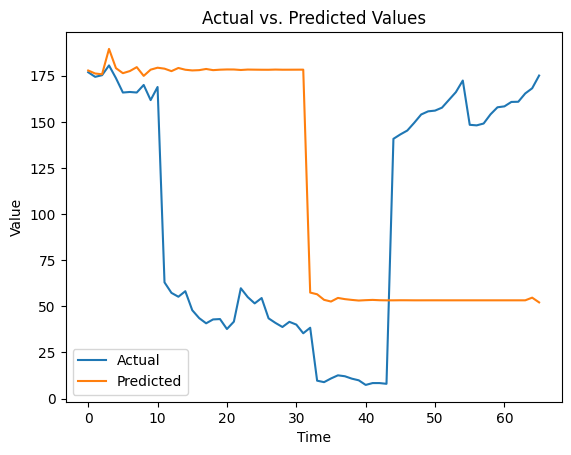

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.843953,176.211157,175.798203,189.538451,179.116159,176.383311,177.529894,179.659658,174.928375,178.289236,179.351880
CO2_ISMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.462340,56.538153,53.527237,52.599416,54.558956,53.907860,53.486333,53.140829,53.338793,53.487909,53.311851
CO2_ISP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.708087,52.136781,49.620126,50.175494,51.062881,50.373091,49.904998,49.971789,50.131577,50.047495,49.934775
CO2_Other Process Uses of Carbonates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.127361,9.946609,9.752532,9.455753,9.688288,9.778047,9.719023,9.764988,9.726050,9.699370,9.731287
HFC_Substitution_of_Ozone_Depleting_Substancesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.329959,149.552365,154.441825,159.177496,164.047611,168.913309,173.611389,177.989905,182.007402,185.712266,189.187675
HFCs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.766755,143.569117,144.750419,142.490270,139.295182,138.691469,135.524748,133.355773,132.599162,131.322058,130.632790


In [8]:
top_three = sorted_coefficients_df.head(3)
lowest_three = sorted_coefficients_df.tail(3)

top_three_indices = top_three.index
lowest_three_indices = lowest_three.index

selected_data = industrial.loc[top_three_indices.union(lowest_three_indices)]

training_data = selected_data.loc[:, '1990':'2010']
testing_data = selected_data.loc[:, '2011':'2021']

predictions = {}

for ind in selected_data.index:
    model = ARIMA(selected_data.loc[ind, '1990':'2010'], order=(5,1,0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(selected_data.loc[ind, '1990':'2021']))
    predictions[ind] = forecast
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=selected_data.columns)

years_training = range(1990, 2011)
years_testing = range(2011, 2022)

training_data_values = training_data.values.flatten()
testing_data_values = testing_data.values.flatten()
predictions_values = np.concatenate(list(predictions.values()))

predictions_values = predictions_values[:len(testing_data_values)]
mae = mean_absolute_error(testing_data_values, predictions_values)
mse = mean_squared_error(testing_data_values, predictions_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

plt.plot(testing_data_values, label='Actual')
plt.plot(predictions_values, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(predictions_df)